In [1]:
COLAB = 'google.colab' in str(get_ipython())
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd /content/drive/MyDrive/Thesis/

In [2]:
import real_stuff.evaluating as evaluating
import real_stuff.simulating as simulating
import real_stuff.training as training
from real_stuff.basic_imports import *

import importlib  # doesn't work too well in Colab

Situation 3: sampling 5000 X_i ~ a mixture of normals.
X:
 [0.732 0.832 0.612 ... 0.907 0.467 0.981]
Normalized funcs(X) = Y probabilities:
[[0.168 0.832]
 [0.127 0.873]
 [0.518 0.482]
 ...
 [0.174 0.826]
 [0.98  0.02 ]
 [0.345 0.655]]
Unnormalized funcs(X):
[[0.64  3.166]
 [0.549 3.785]
 [0.729 0.68 ]
 ...
 [0.478 2.26 ]
 [0.791 0.016]
 [0.406 0.772]]
Euclidean distance between those: 135.81809628088894


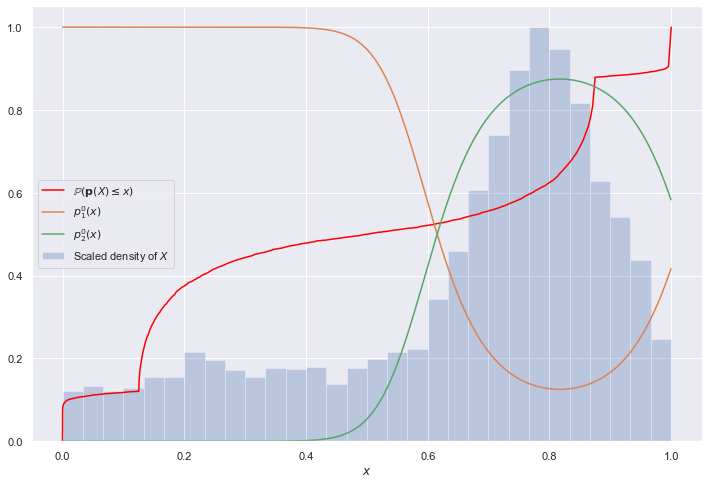

In [20]:
importlib.reload(simulating)
situation = 3
X, funcs, Y_prob = simulating.create_dataset(str(situation), viz=True)

Max 0/1-accuracy during training: 0.8508
Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping


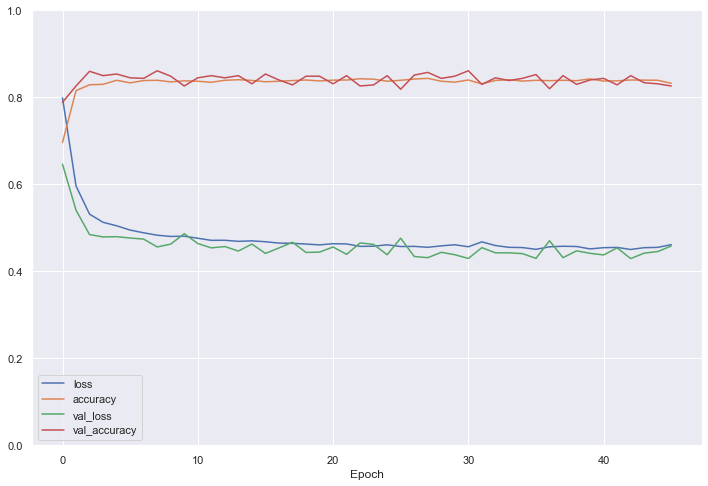

In [21]:
importlib.reload(training)
model, *test_sets = training.train_network(X, Y_prob, viz=1)

In [22]:
importlib.reload(evaluating)
losses = evaluating.test_loss(model, *test_sets)
print(losses)

{'One-hot log-like': 0.3736559, 'One-hot KL': 0.37365454, 'Probability vec log-like': 0.38982794, 'Probability vec KL': 0.011184618}


Some examples from test set:
X:
[[0.383]
 [0.75 ]
 [0.828]
 ...
 [0.907]
 [0.467]
 [0.981]]
True:
[[0.999 0.001]
 [0.151 0.849]
 [0.126 0.874]
 ...
 [0.174 0.826]
 [0.98  0.02 ]
 [0.345 0.655]]
Predict:
[[0.997 0.003]
 [0.196 0.804]
 [0.186 0.814]
 ...
 [0.177 0.823]
 [0.996 0.004]
 [0.168 0.832]]


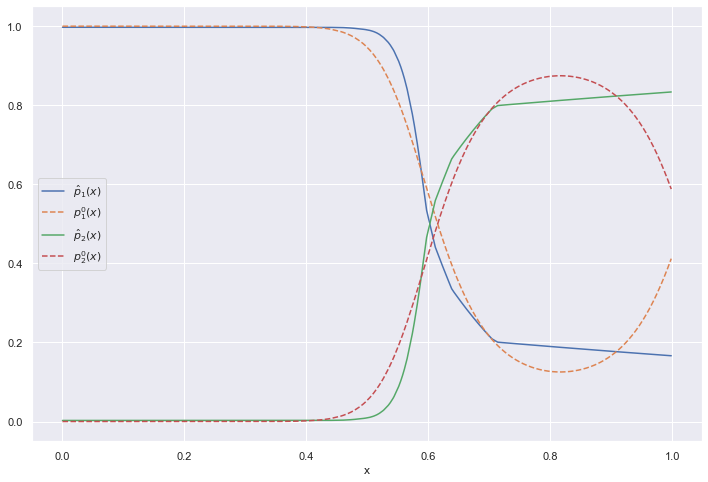

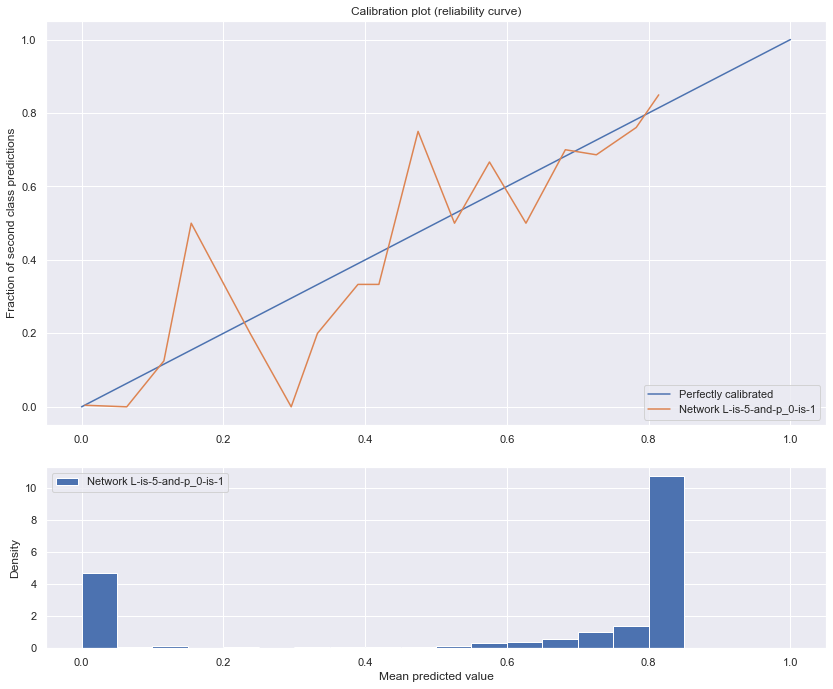

In [25]:
importlib.reload(evaluating)
evaluating.visualize(model, *test_sets)

In [24]:
print(evaluating.get_sparsity(model))

Biases > 0.001:  26  out of 98. 
Weights > 0.001: 182 out of 1584.


In [ ]:
def simulate_train_evaluate(situation):
    X, funcs, Y_prob = simulating.create_dataset(str(situation), viz=True)
    model, *test_sets = training.train_network(X, Y_prob, viz=1)
    print(evaluating.test_loss(model, *test_sets))
    evaluating.visualize(model, *test_sets)
    print(evaluating.get_sparsity(model))

In [ ]:
simulate_train_evaluate(2)